# Setup

**Imports**

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from loadmydata.load_human_locomotion import (
    load_human_locomotion_dataset,
    get_code_list,
)
import cmath

**Utility functions**

In [127]:
def fig_ax(figsize=(15, 5)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.autoscale(enable=True, axis='x', tight=True)
    return fig, ax

# Spectral feature

## Question 6

200 200


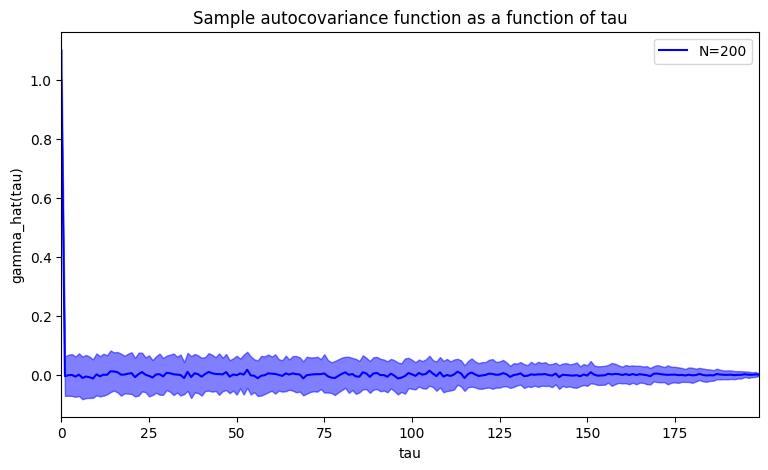

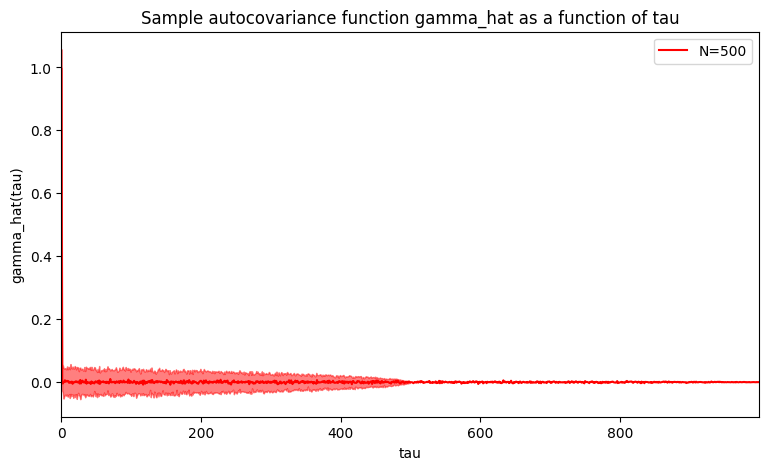

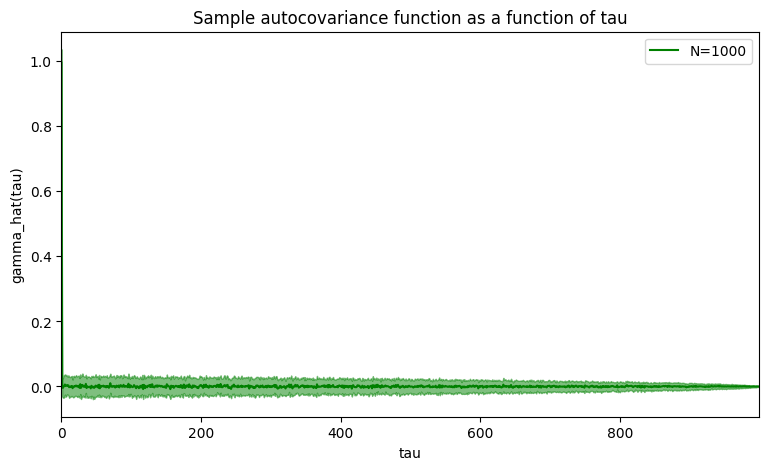

In [128]:
# This is an example of plot (random data). You can change it if you want.

## Change the following lines
N_list=[200,500,1000]

X_200 = np.random.randn(100, 200)  # shape (n_trials, n_freqs)
#print(X_200)
X_500 = np.random.randn(100, 500)
X_1000 = np.random.randn(100, 1000)
print(X_200[0].size, np.sum(X_200, axis=0).size)

freqs_200 = np.linspace(0, 0.5, 200)
freqs_500=np.linspace(0, 0.5, 500)
freqs_1000=np.linspace(0, 0.5, 1000)
#print(periodograms)
##
#fig, ax = fig_ax(figsize=(9, 5))

#avg = X_200.mean(axis=0)
#std = X_200.std(axis=0)
#ax.plot(freqs_200, avg, 'k-')
#ax.fill_between(freqs_200, avg-std, avg+std, alpha=0.5)
#plt.show()

#sample autocovariance function for N=200
tau_200=np.arange(0,200)
N_200=200
gamma_200=np.array([(1/N_200)*np.mean(np.sum(X_200[:,:N_200-t]*X_200[:,t:], axis=1)) for t in tau_200])
#std of the estimators
std_200=np.array([np.std((1/N_200)*(np.sum(X_200[:,:N_200-t]*X_200[:,t:], axis=1))) for t in tau_200])

#print(X_200[:,40:80], X_200[:,40:80].shape)


#sample autocovariance function for N=500
tau_500=np.arange(0,500)
N_500=500
#average value of the estimators
gamma_500=np.array([(1/N_500)*np.mean(np.sum(X_500[:,:N_500-t]*X_500[:,t:], axis=1)) for t in tau_500])
#std of the estimators
std_500=np.array([np.std((1/N_500)*(np.sum(X_500[:,:N_500-t]*X_500[:,t:], axis=1))) for t in tau_500])

#sample autocovariance function for N=1000
tau_1000=np.arange(0,1000)
N_1000=1000

#average value of the estimators
gamma_1000=np.array([(1/N_1000)*np.mean(np.sum(X_1000[:,:N_1000-t]*X_1000[:,t:], axis=1)) for t in tau_1000])
#std of the estimators
std_1000=np.array([np.std((1/N_1000)*(np.sum(X_1000[:,:N_1000-t]*X_1000[:,t:], axis=1))) for t in tau_1000])
#print(std_1000)
fig4,ax4=fig_ax(figsize=(9, 5))
ax4.plot(tau_200, gamma_200, color='b', label='N=200')
ax4.fill_between(tau_200, gamma_200-std_200, gamma_200+std_200,color='b', alpha=0.5)
plt.ylabel('gamma_hat(tau)')
plt.xlabel('tau')
plt.title('Sample autocovariance function as a function of tau')
plt.legend()
plt.show()

fig3,ax3=fig_ax(figsize=(9, 5))
ax3.plot(tau_1000, gamma_1000, color='r', label='N=500')
ax3.fill_between(tau_500, gamma_500-std_500, gamma_500+std_500,color='r', alpha=0.5)
plt.ylabel('gamma_hat(tau)')
plt.xlabel('tau')
plt.title('Sample autocovariance function gamma_hat as a function of tau')
plt.legend()
plt.show()

fig2,ax2=fig_ax(figsize=(9, 5))
ax2.plot(tau_1000, gamma_1000, color='g', label='N=1000')
ax2.fill_between(tau_1000, gamma_1000-std_1000, gamma_1000+std_1000,color='g', alpha=0.5)
plt.ylabel('gamma_hat(tau)')
plt.xlabel('tau')
plt.title('Sample autocovariance function as a function of tau')
plt.legend()
plt.show()

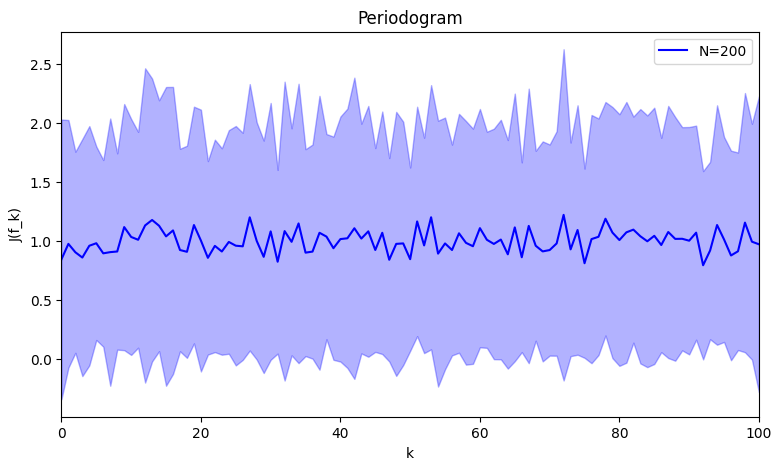

In [129]:
#Periodograms

#N=200
ls_200=(-2*np.pi*1j/N_200)*tau_200
J_fk_avg=[]
J_fk_std=[]
ls_k200=np.arange(0,101)
for k in range(0,101):
    f_k=np.exp(k*ls_200)
    exp_k=np.tile(f_k,(100,1))
    #print(exp_k, exp_k.shape, X_200.shape)
    J_f=(1/np.sqrt(N_200))*np.sum(X_200*exp_k, axis=1)
    J_fk2=J_f*np.conj(J_f)
    #print(J_fk2, J_fk2.shape)
    #print(J_f.shape)
    J_fk_avg.append(np.mean(J_fk2))
    J_fk_std.append(np.std(J_fk2))
J_fk_avg=np.real(J_fk_avg)
J_fk_std=np.real(J_fk_std)
#print(J_fk_avg, J_fk_std)

fig_200,ax_200=fig_ax((9,5))
ax_200.plot(ls_k200, J_fk_avg, color='b', label='N=200')
ax_200.fill_between(ls_k200, J_fk_avg-J_fk_std, J_fk_avg+J_fk_std,color='b', alpha=0.3)
plt.ylabel('J(f_k)')
plt.xlabel('k')
plt.title('Periodogram')
plt.legend()
plt.show()

    

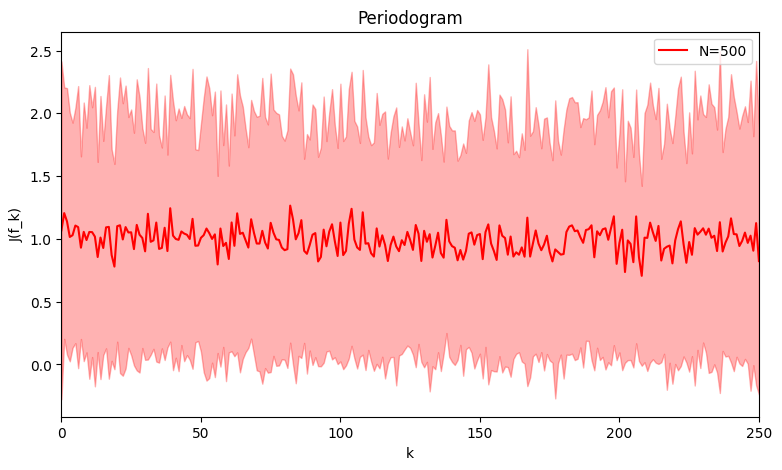

In [130]:
#N=500
ls_500=(-2*np.pi*1j/N_500)*tau_500
J_fk_avg_500=[]
J_fk_std_500=[]
ls_k500=np.arange(0,251)
for k in range(0,251):
    f_k=np.exp(k*ls_500)
    exp_k=np.tile(f_k,(100,1))
    #print(exp_k, exp_k.shape, X_200.shape)
    J_f=(1/np.sqrt(N_500))*np.sum(X_500*exp_k, axis=1)
    J_fk2=J_f*np.conj(J_f)
    #print(J_f.shape)
    J_fk_avg_500.append(np.mean(J_fk2))
    J_fk_std_500.append(np.std(J_fk2))
J_fk_avg_500=np.real(J_fk_avg_500)
J_fk_std_500=np.real(J_fk_std_500)
#print(J_fk_avg, J_fk_std)

fig_500,ax_500=fig_ax((9,5))
ax_500.plot(ls_k500, J_fk_avg_500, color='r', label='N=500')
ax_500.fill_between(ls_k500, J_fk_avg_500-J_fk_std_500, J_fk_avg_500+J_fk_std_500,color='r', alpha=0.3)
plt.ylabel('J(f_k)')
plt.xlabel('k')
plt.title('Periodogram')
plt.legend()
plt.show()


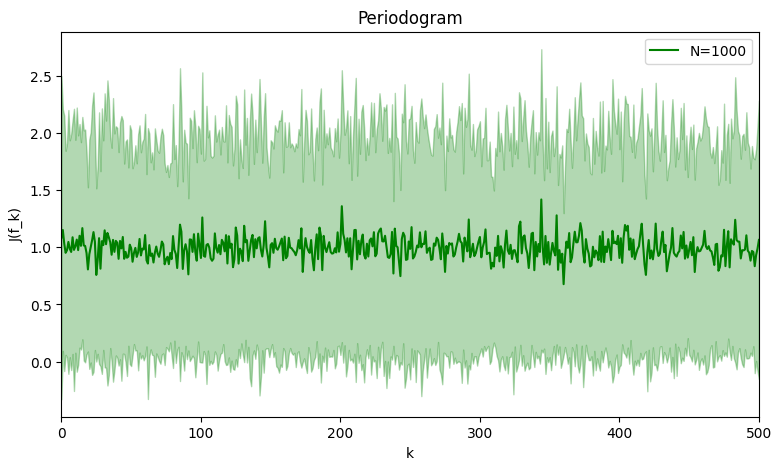

In [131]:
#N=1000
ls_1000=(-2*np.pi*1j/N_1000)*tau_1000
J_fk_avg_1000=[]
J_fk_std_1000=[]
ls_k1000=np.arange(0,501)
for k in range(0,501):
    f_k=np.exp(k*ls_1000)
    exp_k=np.tile(f_k,(100,1))
    #print(exp_k, exp_k.shape, X_200.shape)
    J_f=(1/np.sqrt(N_1000))*np.sum(X_1000*exp_k, axis=1)
    J_fk2=J_f*np.conj(J_f)
    #print(J_f.shape)
    J_fk_avg_1000.append(np.mean(J_fk2))
    J_fk_std_1000.append(np.std(J_fk2))
J_fk_avg_1000=np.real(J_fk_avg_1000)
J_fk_std_1000=np.real(J_fk_std_1000)
#print(J_fk_avg, J_fk_std)

fig_1000,ax_1000=fig_ax((9,5))
ax_1000.plot(ls_k1000, J_fk_avg_1000, color='g', label='N=1000')
ax_1000.fill_between(ls_k1000, J_fk_avg_1000-J_fk_std_1000, J_fk_avg_1000+J_fk_std_1000,color='g', alpha=0.3)
plt.ylabel('J(f_k)')
plt.xlabel('k')
plt.title('Periodogram')
plt.legend()
plt.show()

## Question 9

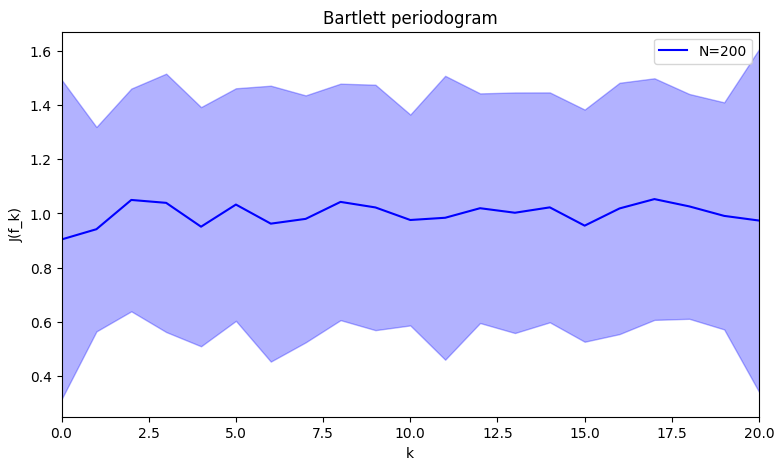

In [132]:
#computation of Bartlett's estimate


K=5
#first for N=200
tau_B200=np.arange(0,N_200/K)
lsB_200=(-2*np.pi*1j/(N_200/K))*tau_B200 #tentative 
J_fkB_avg=[]
J_fkB_std=[]
ls_kB200=np.arange(0,N_200/(2*K)+1)
for k in range(0,21):
    B_k=np.zeros((1,100))
    f_k=np.exp(k*lsB_200)
    exp_k=np.tile(f_k,(100,1))
    #print(exp_k, exp_k.shape, X_200.shape)
    for l in range(0,K):
        J_f=(1/np.sqrt(N_200/K))*np.sum(X_200[:,l*40:(l+1)*40]*exp_k, axis=1)
        J_fk2=J_f*np.conj(J_f)
        B_k+=np.real((1/K)*J_fk2)
    #print(J_fk2, J_fk2.shape)
    #print(J_f.shape)
    J_fkB_avg.append(np.mean(B_k))
    J_fkB_std.append(np.std(B_k))
J_fkB_avg=np.real(J_fkB_avg)
J_fkB_std=np.real(J_fkB_std)

fig_B200,ax_B200=fig_ax((9,5))
ax_B200.plot(ls_kB200, J_fkB_avg, color='b', label='N=200')
ax_B200.fill_between(ls_kB200, J_fkB_avg-J_fkB_std, J_fkB_avg+J_fkB_std,color='b', alpha=0.3)
plt.ylabel('J(f_k)')
plt.xlabel('k')
plt.title('Bartlett periodogram')
plt.legend()
plt.show()


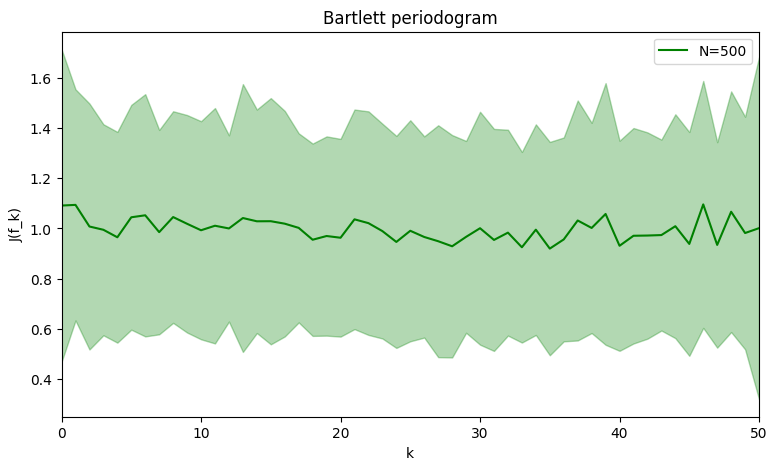

In [133]:

#first for N=500
tau_B500=np.arange(0,N_500/K)
lsB_500=(-2*np.pi*1j/(N_500/K))*tau_B500
J_fkB_avg_500=[]
J_fkB_std_500=[]
ls_kB500=np.arange(0,N_500/(2*K)+1)
for k in range(0,51):
    B_k=np.zeros((1,100))
    f_k=np.exp(k*lsB_500)
    exp_k=np.tile(f_k,(100,1))
    #print(exp_k, exp_k.shape, X_200.shape)
    for l in range(0,K):
        J_f=(1/np.sqrt(N_500/K))*np.sum(X_500[:,l*100:(l+1)*100]*exp_k, axis=1)
        J_fk2=J_f*np.conj(J_f)
        B_k+=np.real((1/K)*J_fk2)
    #print(J_fk2, J_fk2.shape)
    #print(J_f.shape)
    J_fkB_avg_500.append(np.mean(B_k))
    J_fkB_std_500.append(np.std(B_k))
J_fkB_avg_500=np.real(J_fkB_avg_500)
J_fkB_std_500=np.real(J_fkB_std_500)

fig_B500,ax_B500=fig_ax((9,5))
ax_B500.plot(ls_kB500, J_fkB_avg_500, color='g', label='N=500')
ax_B500.fill_between(ls_kB500, J_fkB_avg_500-J_fkB_std_500, J_fkB_avg_500+J_fkB_std_500,color='g', alpha=0.3)
plt.ylabel('J(f_k)')
plt.xlabel('k')
plt.title('Bartlett periodogram')
plt.legend()
plt.show()

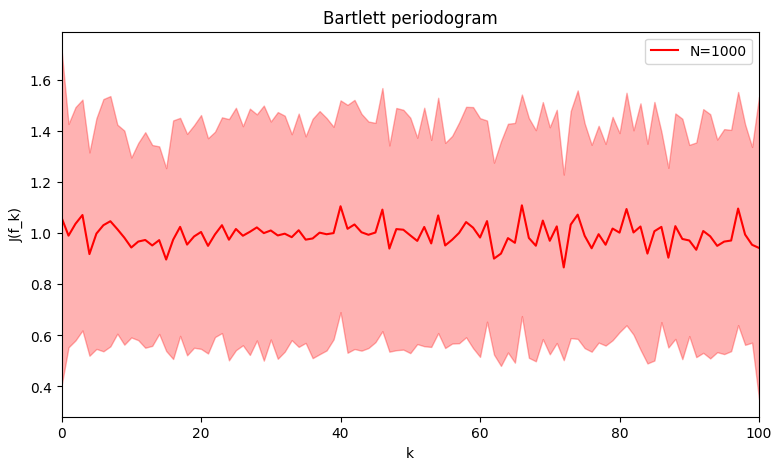

In [134]:
#first for N=1000
tau_B1000=np.arange(0,N_1000/K)
lsB_1000=(-2*np.pi*1j/(N_1000/K))*tau_B1000
J_fkB_avg_1000=[]
J_fkB_std_1000=[]
ls_kB1000=np.arange(0,N_1000/(2*K)+1)
for k in range(0,101):
    B_k=np.zeros((1,100))
    f_k=np.exp(k*lsB_1000)
    exp_k=np.tile(f_k,(100,1))
    #print(exp_k, exp_k.shape, X_200.shape)
    for l in range(0,K):
        J_f=(1/np.sqrt(N_1000/K))*np.sum(X_1000[:,l*200:(l+1)*200]*exp_k, axis=1)
        J_fk2=J_f*np.conj(J_f)
        B_k+=np.real((1/K)*J_fk2)
    #print(J_fk2, J_fk2.shape)
    #print(J_f.shape)
    J_fkB_avg_1000.append(np.mean(B_k))
    J_fkB_std_1000.append(np.std(B_k))
J_fkB_avg_1000=np.real(J_fkB_avg_1000)
J_fkB_std_1000=np.real(J_fkB_std_1000)

fig_B1000,ax_B1000=fig_ax((9,5))
ax_B1000.plot(ls_kB1000, J_fkB_avg_1000, color='r', label='N=1000')
ax_B1000.fill_between(ls_kB1000, J_fkB_avg_1000-J_fkB_std_1000, J_fkB_avg_1000+J_fkB_std_1000,color='r', alpha=0.3)
plt.ylabel('J(f_k)')
plt.xlabel('k')
plt.title('Bartlett periodogram')
plt.legend()
plt.show()

# Dynamic time warping (DTW)

## Data

This data set consists of signals collected with inertial measurement units (accelerometer+gyroscope), from 230 subjects undergoing a fixed protocol:
- standing still,
- walking 10 m,
- turning around,
- walking back,
- stopping.

In this assignment, we only consider the vertical acceleration of the left foot and all signals are truncated to 20 seconds (as a result, they all have same length). Signals are sampled at 100 Hz.

The measured population is composed of healthy subjects as well as patients with neurological or orthopedic disorders.

The start and end time stamps of thousands of footsteps are available.

The data are part of a larger data set described in [1].

[1] Truong, C., Barrois-Müller, R., Moreau, T., Provost, C., Vienne-Jumeau, A., Moreau, A., Vidal, P.-P., Vayatis, N., Buffat, S., Yelnik, A., Ricard, D., & Oudre, L. (2019). A data set for the study of human locomotion with inertial measurements units. Image Processing On Line (IPOL), 9.

**The task** is to classify footsteps in healthy/non-healthy.

The following cell defines the training set `(X_train, y_train)` and testing set `(X_test, y_test)`.

In [135]:
subset_indexes_train = [95, 619, 441, 149, 951, 803, 214, 34, 37, 630]
subset_indexes_test = [683, 259, 59, 387, 634]

code_list = get_code_list()

X_train = list()  # list of footstep signals
y_train = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_train):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_train.append(signal[start:end])
        y_train.append(label)

        
X_test = list()  # list of footstep signals
y_test = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_test):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_test.append(signal[start:end])
        y_test.append(label)

## Question 10
Combine the DTW and a k-neighbors classifier to classify each step. Find the optimal number of neighbors with 5-fold cross-validation and report the optimal number of neighbors and the associated F-score. Comment briefly.## Question 10

In [136]:
!pip install dtw-python

In [137]:
from dtw import dtw

In [138]:
def dtw_distance(X,Y) :
  return dtw(X,Y,keep_internals=False).distance

#First try with 3 neihgbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3,metric =dtw_distance)

print('X_train len =',len(X_train) )
for i in range(len(X_train)):
  print('X_train['+str(i)+'] len =',len(X_train[i]) )
#print('X_train[0] len =',len(X_train[0]) )
#print('X_train[160] len =',len(X_train[160]) )

X_train len = 168
X_train[0] len = 80
X_train[1] len = 78
X_train[2] len = 73
X_train[3] len = 73
X_train[4] len = 74
X_train[5] len = 69
X_train[6] len = 41
X_train[7] len = 69
X_train[8] len = 74
X_train[9] len = 73
X_train[10] len = 82
X_train[11] len = 86
X_train[12] len = 99
X_train[13] len = 81
X_train[14] len = 83
X_train[15] len = 81
X_train[16] len = 73
X_train[17] len = 78
X_train[18] len = 77
X_train[19] len = 76
X_train[20] len = 80
X_train[21] len = 66
X_train[22] len = 74
X_train[23] len = 76
X_train[24] len = 80
X_train[25] len = 77
X_train[26] len = 73
X_train[27] len = 73
X_train[28] len = 89
X_train[29] len = 69
X_train[30] len = 69
X_train[31] len = 72
X_train[32] len = 76
X_train[33] len = 76
X_train[34] len = 80
X_train[35] len = 74
X_train[36] len = 86
X_train[37] len = 79
X_train[38] len = 74
X_train[39] len = 71
X_train[40] len = 72
X_train[41] len = 73
X_train[42] len = 78
X_train[43] len = 72
X_train[44] len = 71
X_train[45] len = 79
X_train[46] len = 79
X_tra

In [139]:
#To fix a bug with length of train data
def complete(X_train) :
  X = np.ones((len(X_train),150))
  for idx,i in enumerate(X_train) :
    X[idx,:len(i)] = i
  return X
X_train = complete(X_train)
X_test = complete(X_test)

print('X_train len=',len(X_train) )

X_train len= 168


In [140]:
#We can now use the two following functions
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)


In [141]:
from sklearn.metrics import f1_score
#print the f-score with 3 neighbors as defined above
f1_score(y_test,predictions)


0.48214285714285715

In [142]:
predictions=[]
knn = KNeighborsClassifier(metric =dtw_distance)
number_neighbors = [2,3,4,5,6]
for i in number_neighbors:
    knn = KNeighborsClassifier(n_neighbors = i,metric =dtw_distance)
    knn.fit(X_train,y_train)
    predictions.append(knn.predict(X_test))

In [143]:
scores = [f1_score(y_test,predictions[i])for i in range(len(predictions) )]

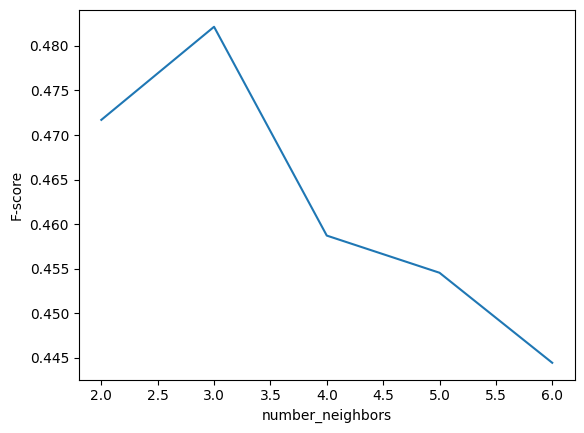

In [144]:
plt.plot(number_neighbors,scores)
plt.xlabel("number_neighbors")
plt.ylabel("F-score")

plt.savefig("knn_f_scores.png")
#We choose n_neighbors to be 5

## Question 11
Display on Figure 3 a badly classified step from each class (healthy/non-healthy).

In [145]:
#We need one set of predictions for the subsequent plot, let us take a knn with 3 neighbors
knn = KNeighborsClassifier(n_neighbors = 3,metric =dtw_distance)

knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

In [146]:
#We must reset the dataset we completed for the previous question
subset_indexes_train = [95, 619, 441, 149, 951, 803, 214, 34, 37, 630]
subset_indexes_test = [683, 259, 59, 387, 634]

code_list = get_code_list()

X_train = list()  # list of footstep signals
y_train = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_train):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_train.append(signal[start:end])
        y_train.append(label)

        
X_test = list()  # list of footstep signals
y_test = list()  # list of pathologies (the "labels")

for code in np.take(code_list, subset_indexes_test):
    single_trial = load_human_locomotion_dataset(code)
    signal = single_trial.signal.LAZ.to_numpy()  # keeping only one dimension (from the left sensor)
    steps = single_trial.left_steps
    pathology = single_trial.metadata["PathologyGroup"]
    label = 0 if pathology=="Healthy" else 1  # 0: healthy, 1: non-healthy
    for (start, end) in steps:
        X_test.append(signal[start:end])
        y_test.append(label)

33


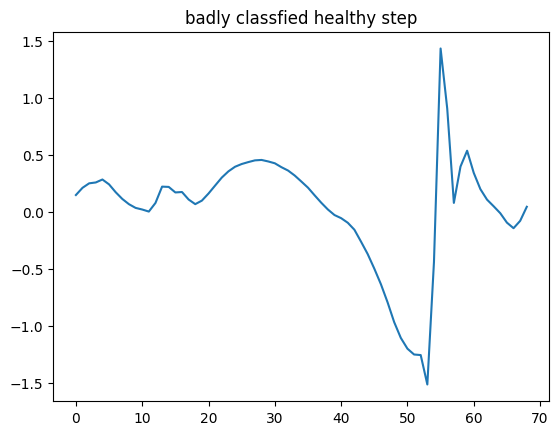

In [147]:
first_index_bad_class = 0
for i in range(len(X_test)) :
  if predictions[i] == 1 and y_test[i] == 0 :
    first_index_bad_class = i
    print(i)
    break


#Badly classified healthy step
plt.plot(X_test[first_index_bad_class])
plt.title("badly classfied healthy step")
plt.savefig("badly classfied healthy step.png")

0


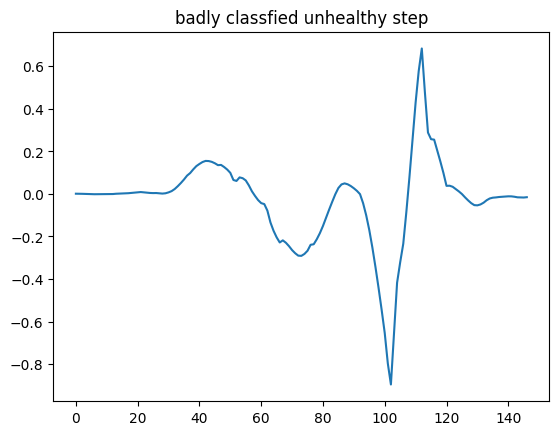

In [148]:
first_index_bad_class_unhealthy = 0
for i in range(len(X_test)) :
  if predictions[i] == 0 and y_test[i] == 1 :
    first_index_bad_class = i
    print(i)
    break
  
#Badly classified unhealthy step
plt.plot(X_test[0])
plt.title("badly classfied unhealthy step")
plt.savefig("badly classfied unhealthy step.png")